/home/liusong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


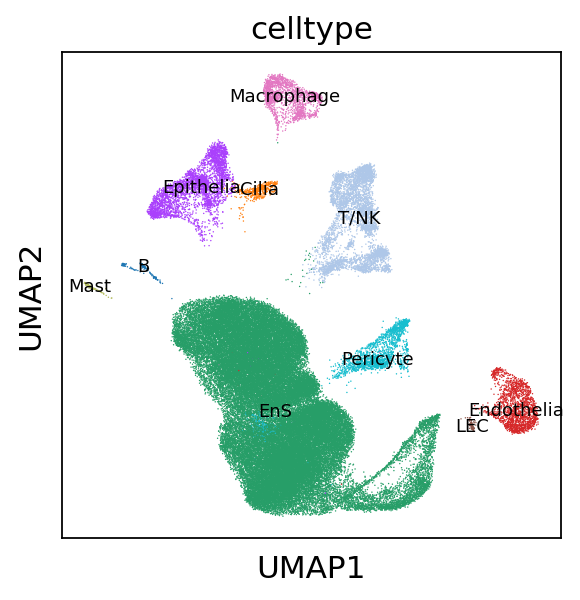

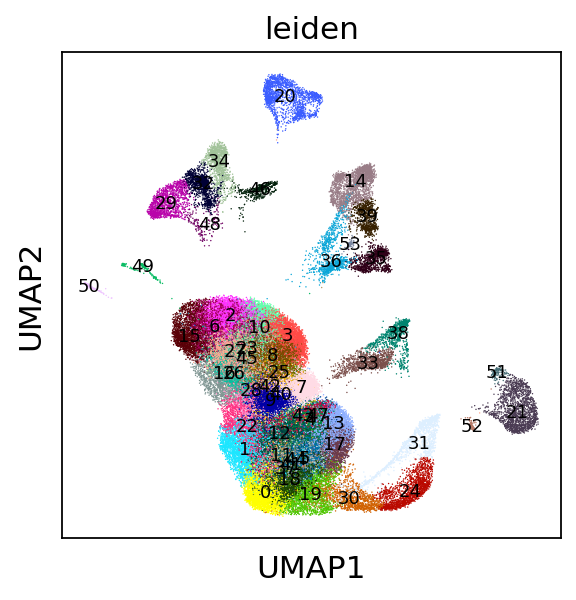

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import scanpy.external as sce
import bbknn
sc.set_figure_params(dpi_save=300)
import os
import anndata as ad


NGdata=sc.read_h5ad("/home/liusong/scRNA/endometriosis/V3data/Downloaded_NG_EUdata/NG_EU_rawdata.h5ad")

alldata=sc.read_10x_h5("/home/liusong/scRNA/endometriosis/V2data/aggregating/21samples/outs/count/filtered_feature_bc_matrix.h5",genome=None,gex_only=True)
alldata.var_names_make_unique()
alldata
ribosomes=alldata.var_names.str.match("^RP[LS]")
alldata=alldata[:,~ribosomes]
alldata.obs['sampleID']=alldata.obs_names.str.lstrip('ATCG-')
ourEU=sc.read_h5ad("/home/liusong/scRNA/endometriosis/V2data/scanpy/21samples/EUdata_umap_leiden_BBKNN.h5ad")

sc.pl.umap(ourEU,color=['celltype'],legend_loc="on data",legend_fontsize='xx-small',legend_fontweight='medium')
sc.tl.leiden(ourEU,resolution=4)
sc.pl.umap(ourEU,color=['leiden'],legend_loc="on data",legend_fontsize='xx-small',legend_fontweight='medium')


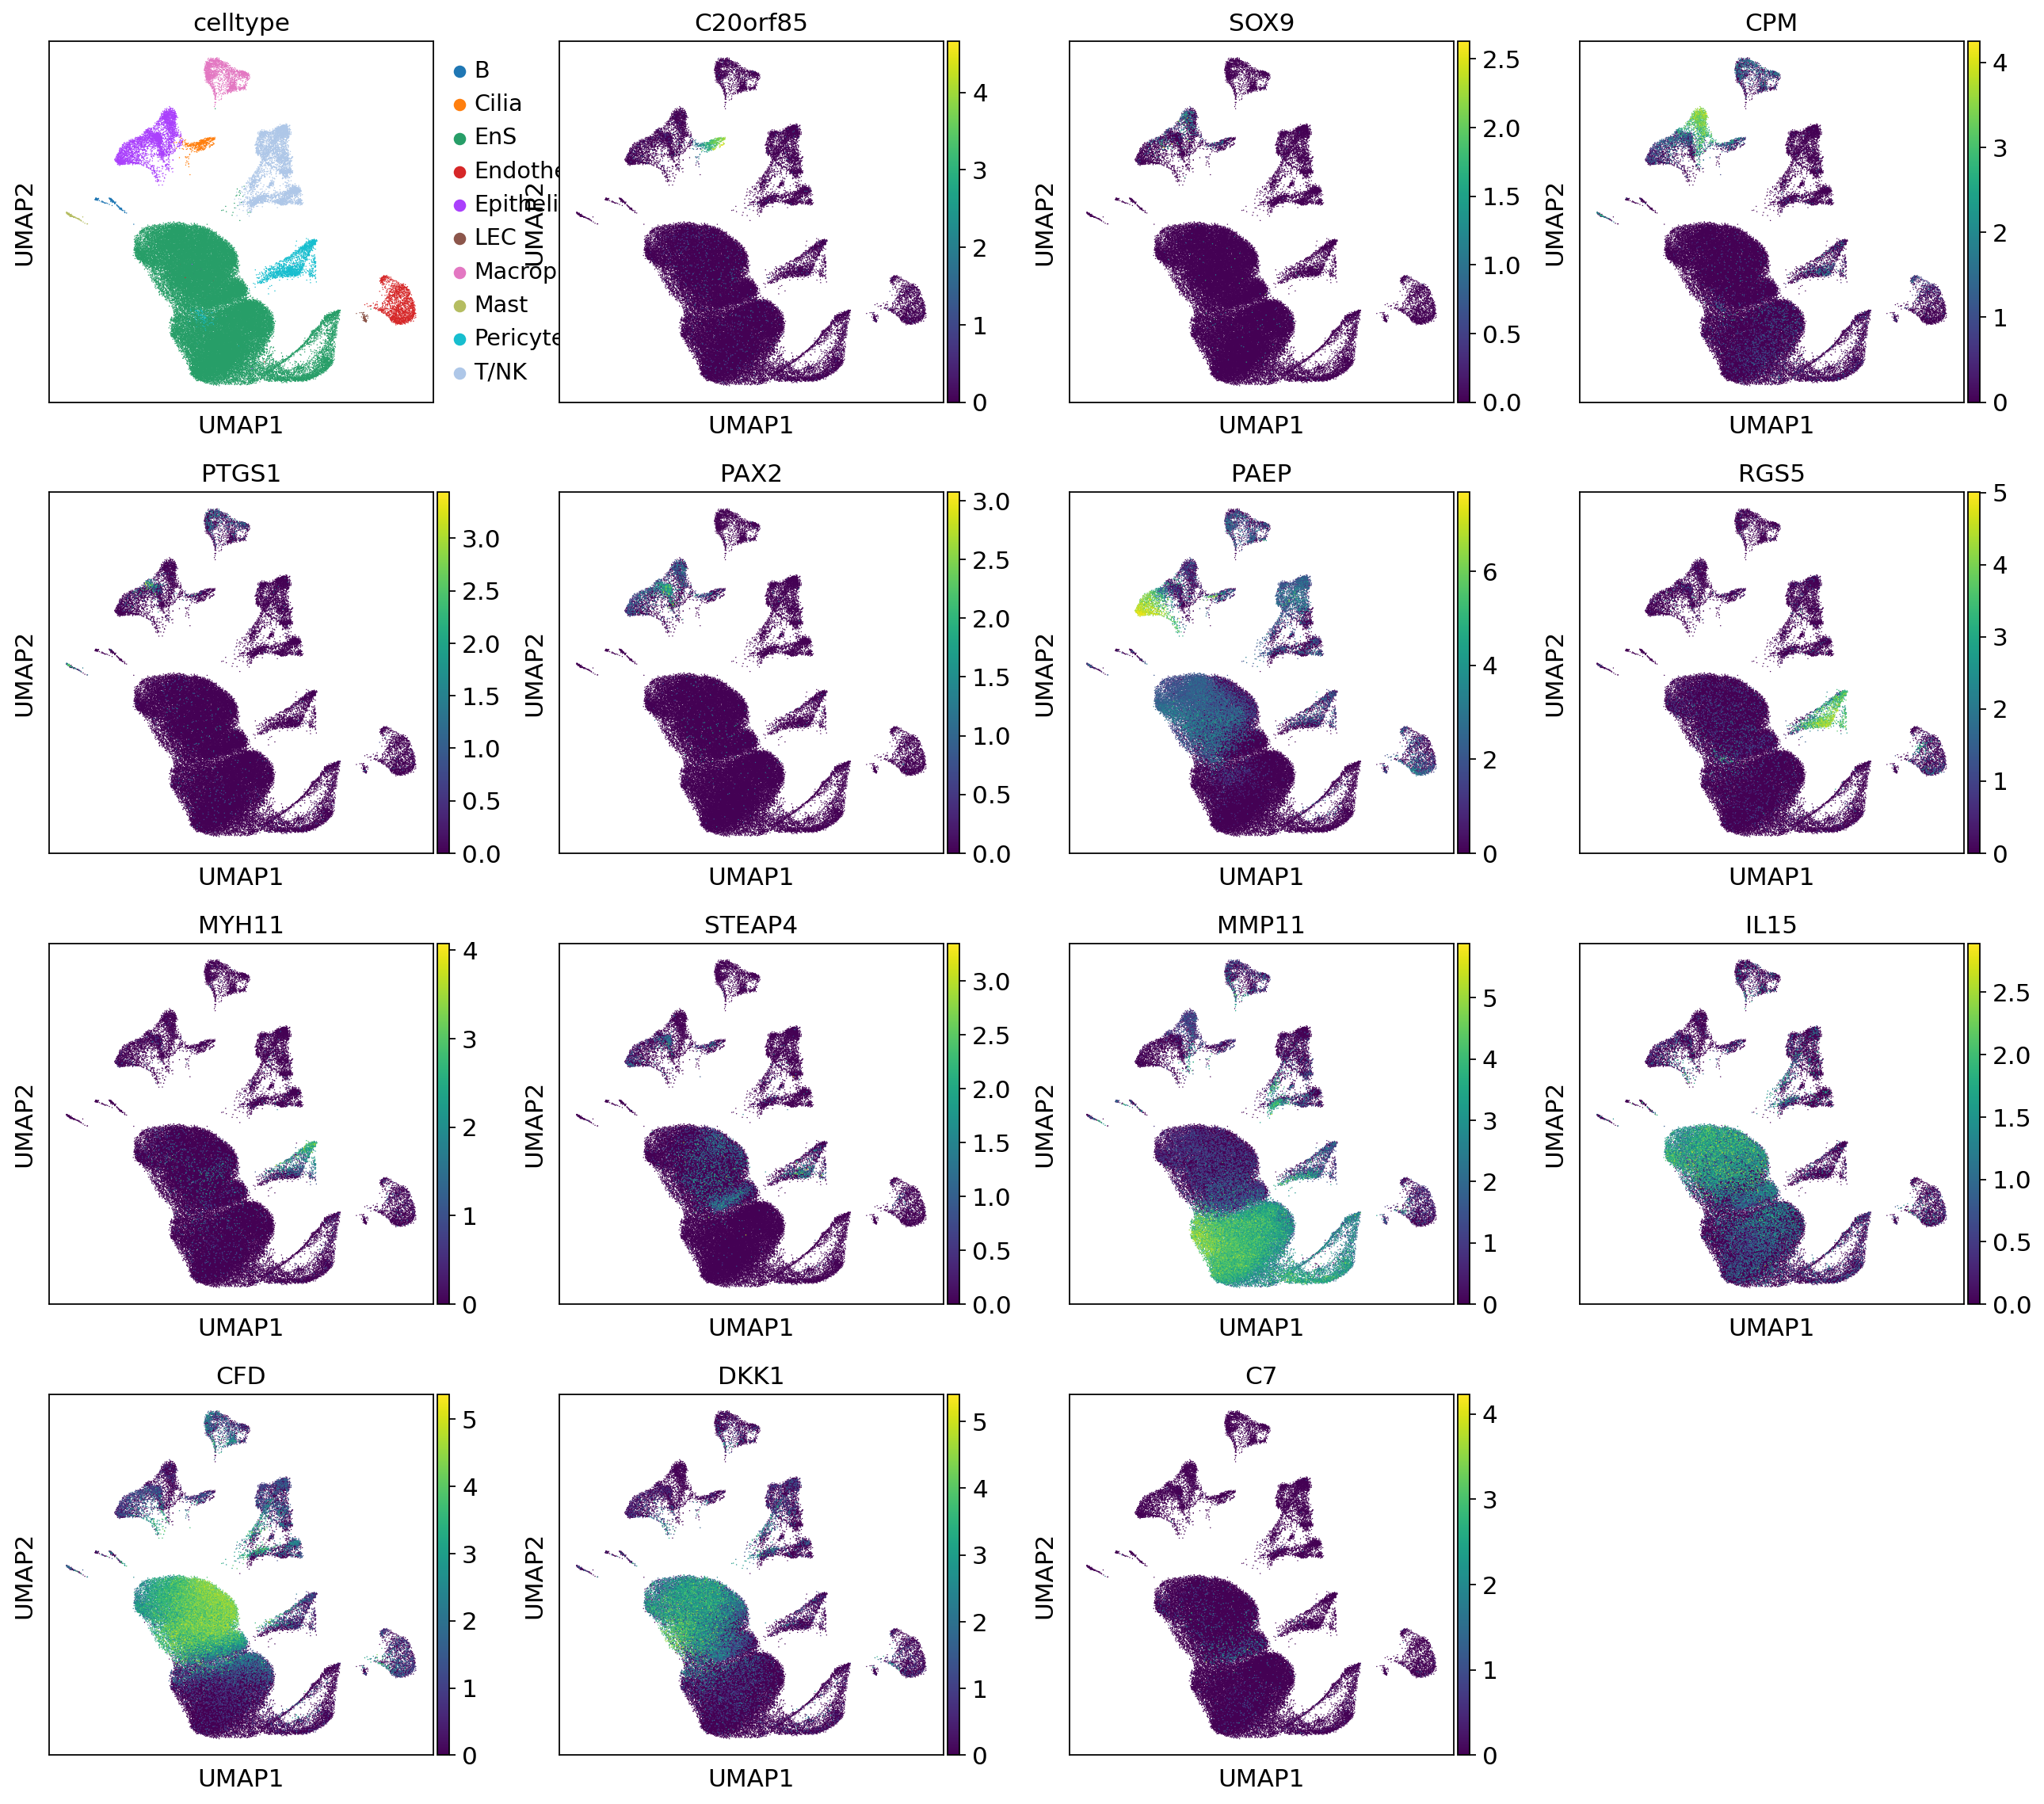

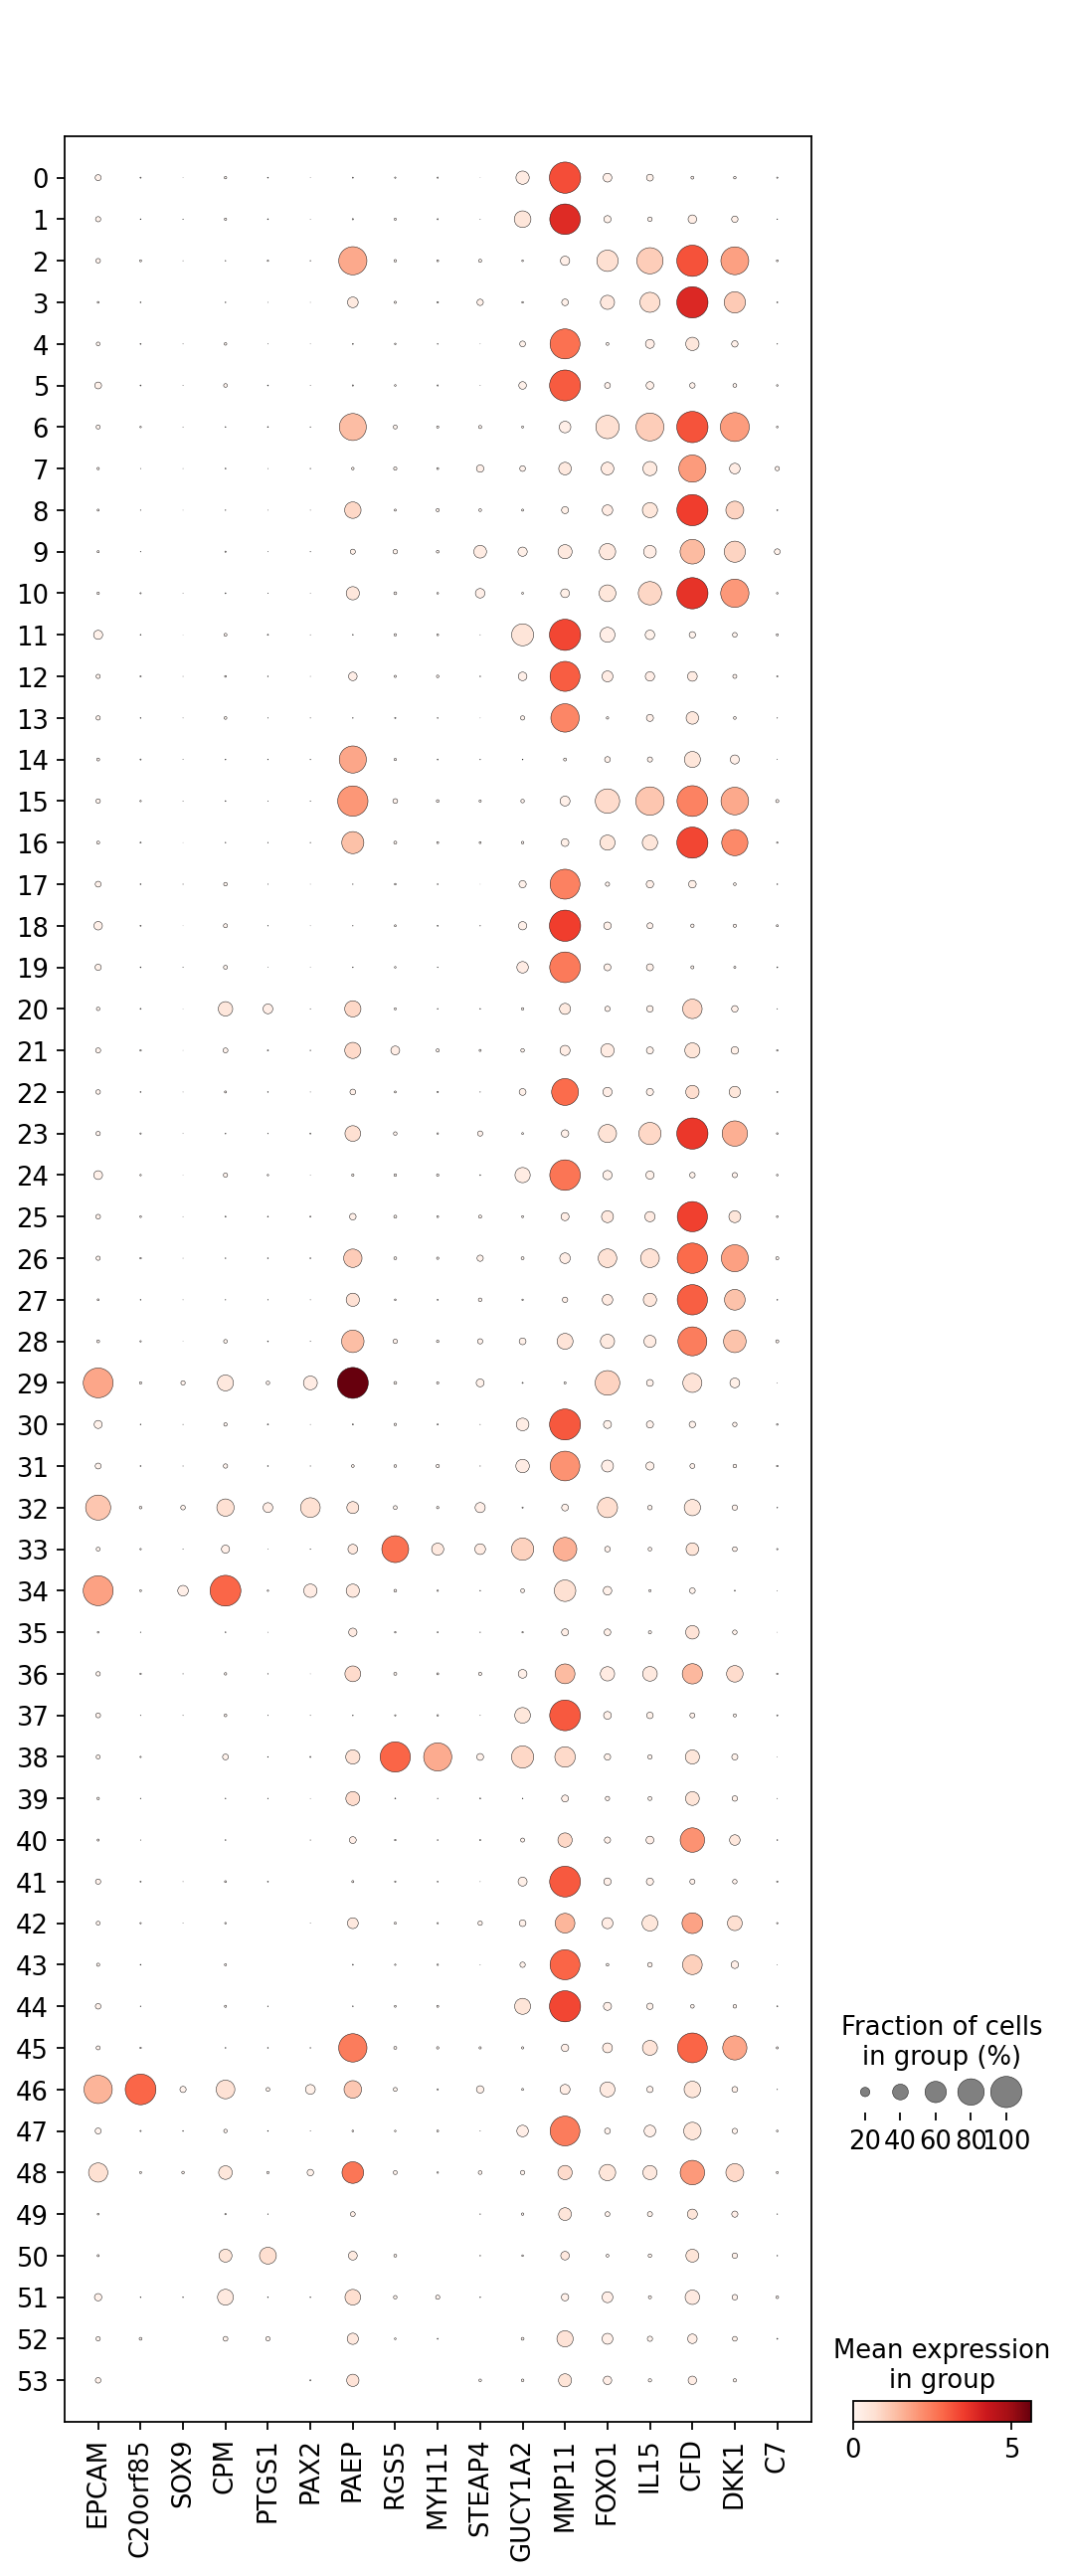

/home/liusong/.local/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


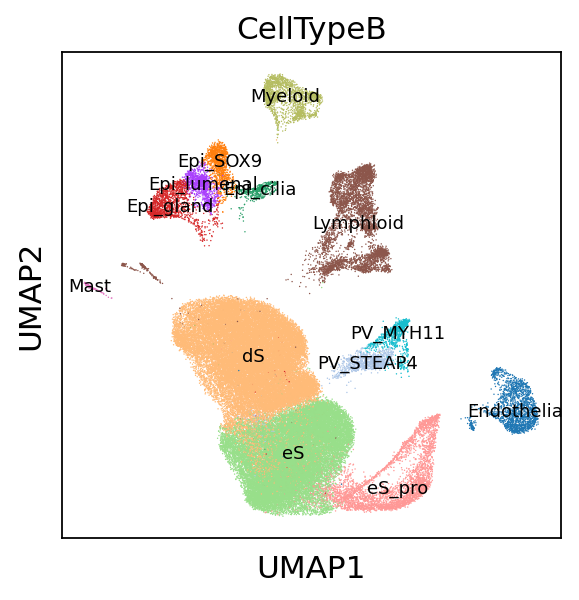

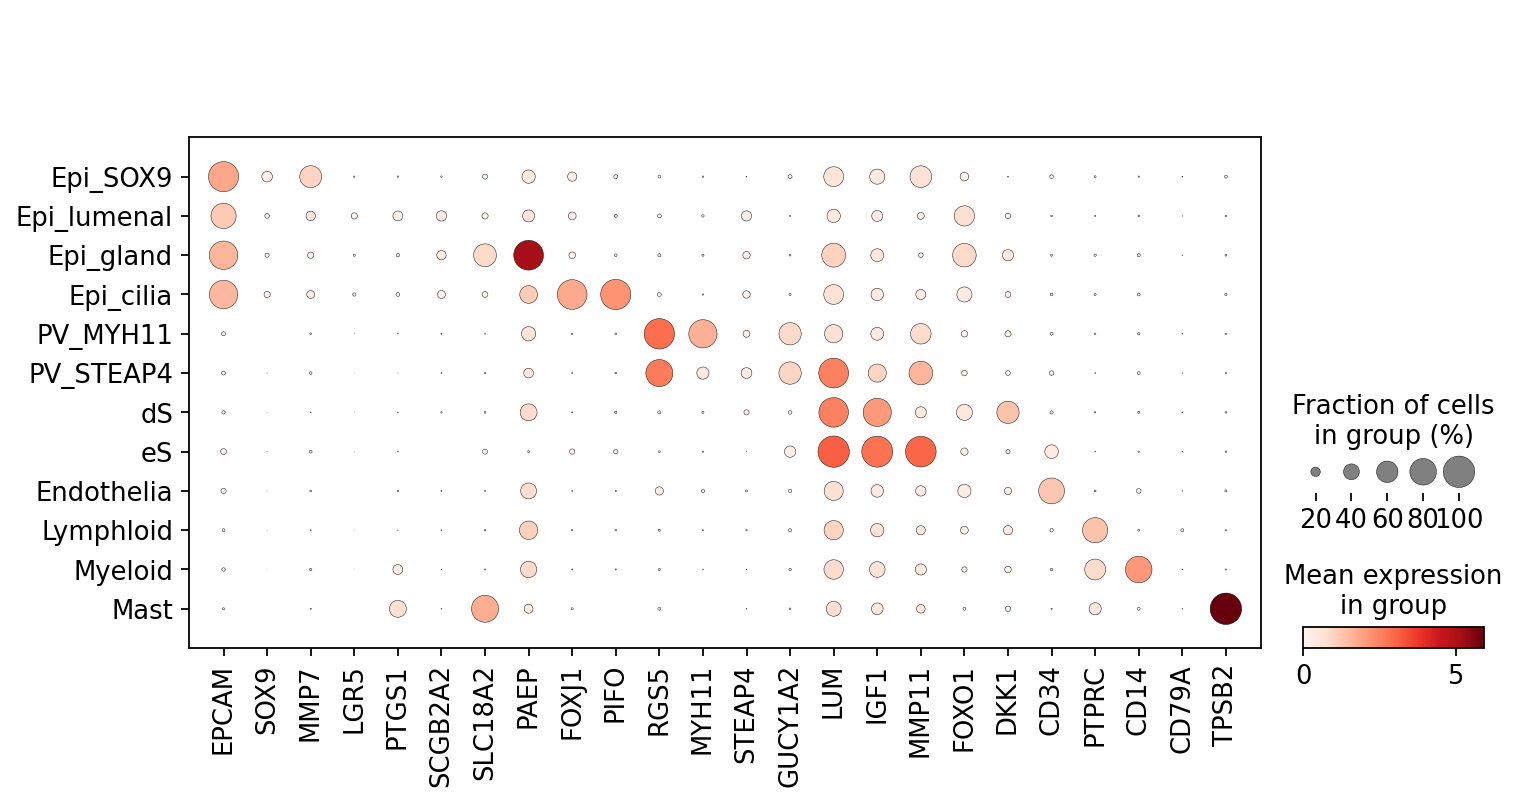

In [20]:
sc.pl.umap(ourEU,color=['celltype','C20orf85','SOX9','CPM','PTGS1','PAX2','PAEP','RGS5','MYH11','STEAP4','MMP11','IL15','CFD','DKK1','C7'])
sc.pl.dotplot(ourEU,['EPCAM','C20orf85','SOX9','CPM','PTGS1','PAX2','PAEP','RGS5','MYH11','STEAP4','GUCY1A2','MMP11','FOXO1','IL15','CFD','DKK1','C7'],groupby="leiden")
res4cluster=['eS_0','eS_1','dS_2','dS_3','eS_4','eS_5','dS_6','dS_7','dS_8','dS_9','dS_10','eS_11','eS_12','eS_13','Lymphloid14','dS15','dS16','eS17','eS18','eS19','Myeloid20','Endothelia21','dS22','dS23','eS_pro24','dS25','dS26','dS27','dS28','Epi_gland29','eS_pro30','eS_pro31','Epi_lumenal32','PV_STEAP4_33','Epi_SOX9_34','Lymphloid35','Lymphloid36','eS37','PV_MYH11_38','Lymphloid39','dS40','eS41','dS42','eS43','eS44','dS45','Epi_cilia46','eS47','Epi_gland48','Lymphloid49','Mast50','Endothelia51','Endothelia52','Lymphloid53']
ourEU.obs['myname']=ourEU.obs['leiden']
ourEU.rename_categories('myname', res4cluster)
ourEU.obs['CellTypeB']=ourEU.obs.myname.str.rstrip('0123456789')
ourEU.obs['CellTypeB']=ourEU.obs.CellTypeB.str.rstrip('_')
sc.pl.umap(ourEU,color=['CellTypeB'],legend_loc="on data",legend_fontsize='xx-small',legend_fontweight='medium')

myEUs=ourEU[ourEU.obs['CellTypeB']!="eS_pro",]
sc.pl.dotplot(myEUs,['EPCAM',"SOX9",'MMP7','LGR5','PTGS1','SCGB2A2','SLC18A2','PAEP','FOXJ1','PIFO','RGS5','MYH11','STEAP4','GUCY1A2','LUM','IGF1','MMP11','FOXO1','DKK1','CD34','PTPRC','CD14','CD79A','TPSB2'],groupby="CellTypeB",categories_order=['Epi_SOX9','Epi_lumenal','Epi_gland','Epi_cilia','PV_MYH11','PV_STEAP4','dS','eS','Endothelia','Lymphloid','Myeloid','Mast'])
#categories_order=['Epi_SOX9','Epi_lumenal','Epi_gland','Epi_cilia','PV_MYH11','PV_STEAP4','dS','eS','Endothelia','Lymphloid','Myeloid','Mast']

In [8]:
EUdata=alldata[ourEU.obs_names,:]

NGdata.obs['Batch']="NGdata"
EUdata.obs['Batch']="EUdata"

EUdata.obs['CellTypeA']=ourEU.obs['celltype']
EUdata.obs['CellTypeB']=ourEU.obs['CellTypeB']
EUdata.obs['sampleID']=["EU_" + x for x in EUdata.obs['sampleID'].astype('str')]
EUdata.obs['DonorID']=EUdata.obs['sampleID']

NGdata.obs['sampleID']=NGdata.obs_names.str[0:15]
NGdata=NGdata[NGdata.obs['CellTypeA'] != "Excluded",]
NGdata=NGdata[NGdata.obs['CellTypeA'] != "filtered",]
NGdata=NGdata[NGdata.obs['CellTypeB'] != "Other",]
NGdata.obs['CellTypeB']=NGdata.obs['CellTypeB'].astype("category")
NGdata.obs['CellTypeB']
newgroup=['1Endothelia','Epi_cilia','Fibroblast_C7','Epi_gland','Epi_lumenal','Lymphloid','Myeloid','PV_MYH11','PV_STEAP4','Epi_SOX9','2Endothelia','dS','eS','uSMC']
NGdata.obs['myname']=NGdata.obs['CellTypeB']
NGdata.rename_categories('myname', newgroup)
NGdata.obs['CellTypeB']=NGdata.obs.myname.str.lstrip('0123456789')
NGdata.obs['CellTypeB']


/home/liusong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  after removing the cwd from sys.path.
/home/liusong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


4861STDY7387181_AAACCTGAGGCATGGT            eS
4861STDY7387181_AAACCTGAGGGCACTA            eS
4861STDY7387181_AAACCTGAGTGAAGTT     PV_STEAP4
4861STDY7387181_AAACCTGAGTGGGCTA            dS
4861STDY7387181_AAACCTGCACCGAAAG            eS
                                       ...    
MRC_Endo8715416_TTTGGTTAGATAACAC            eS
MRC_Endo8715416_TTTGGTTCAGCACAAG            eS
MRC_Endo8715416_TTTGTTGAGACTTCGT            eS
MRC_Endo8715416_TTTGTTGCATAAGCAA    Endothelia
MRC_Endo8715416_TTTGTTGTCGAGATAA      Epi_SOX9
Name: CellTypeB, Length: 40180, dtype: object

/home/liusong/.local/lib/python3.7/site-packages/anndata/_core/merge.py:945: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


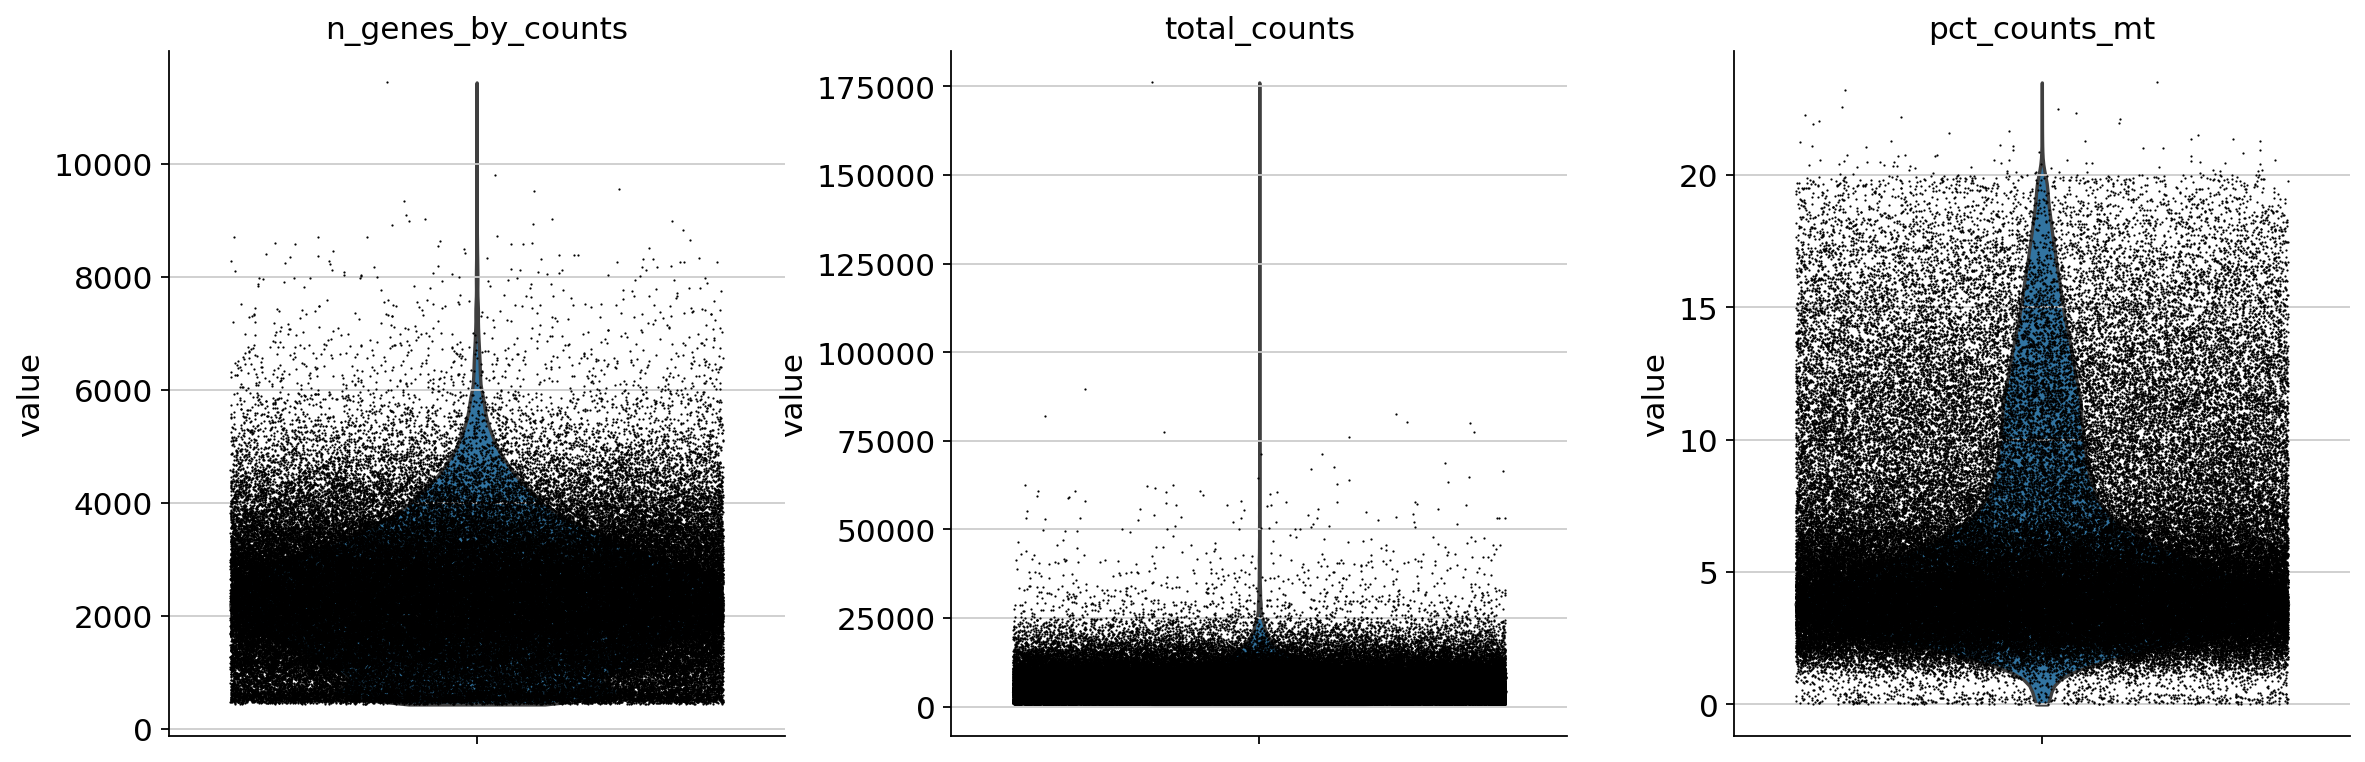

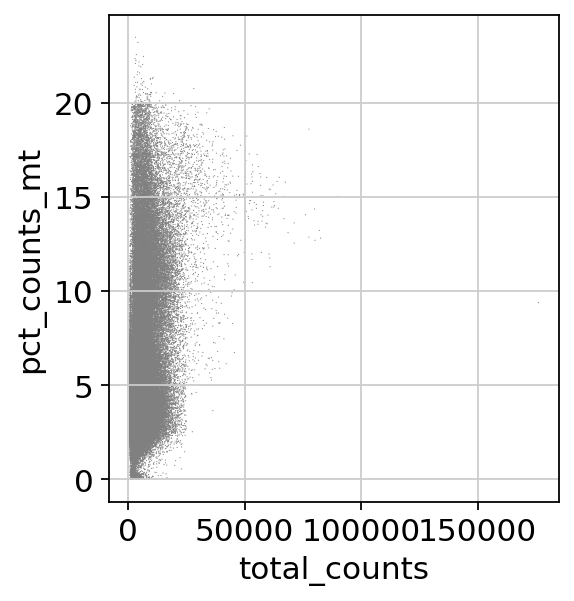

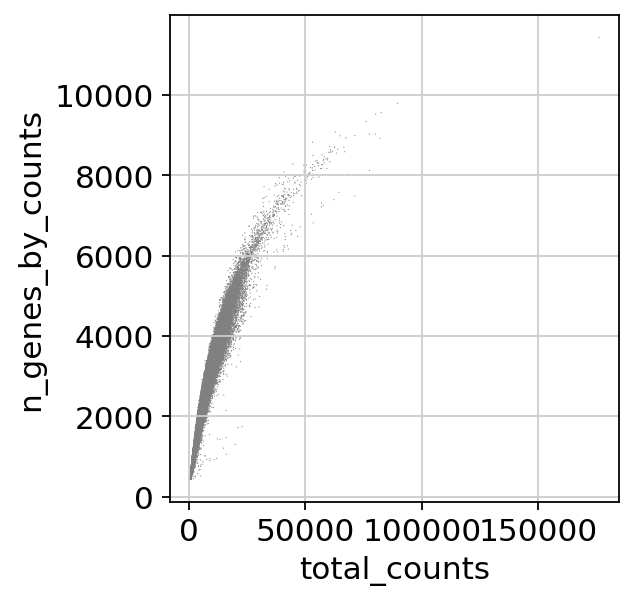

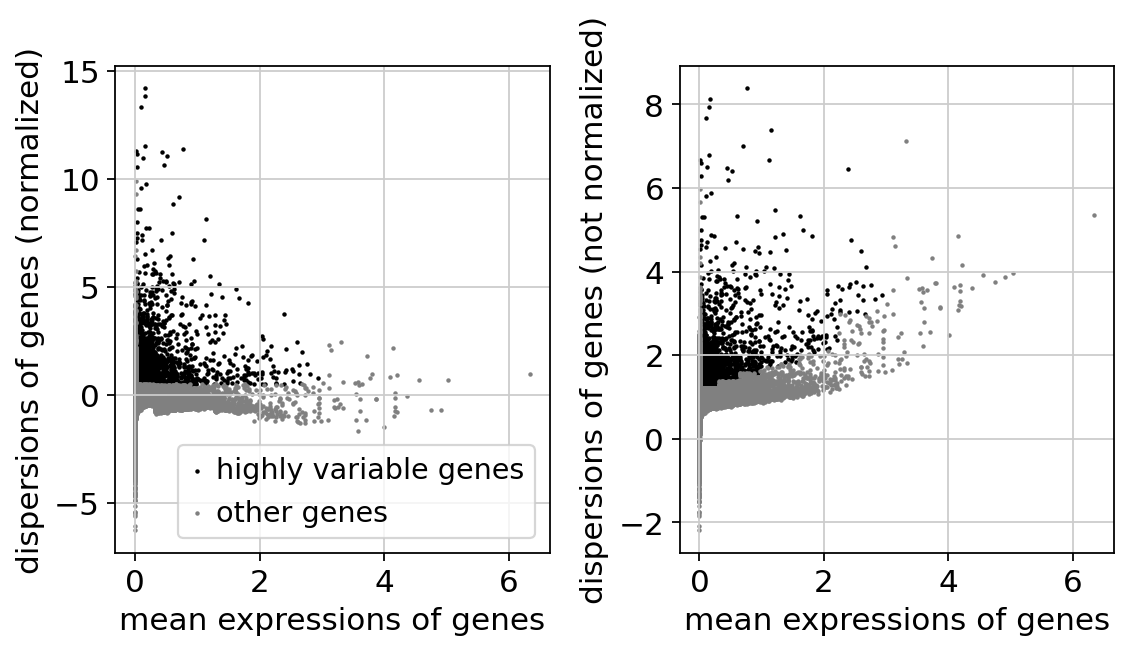

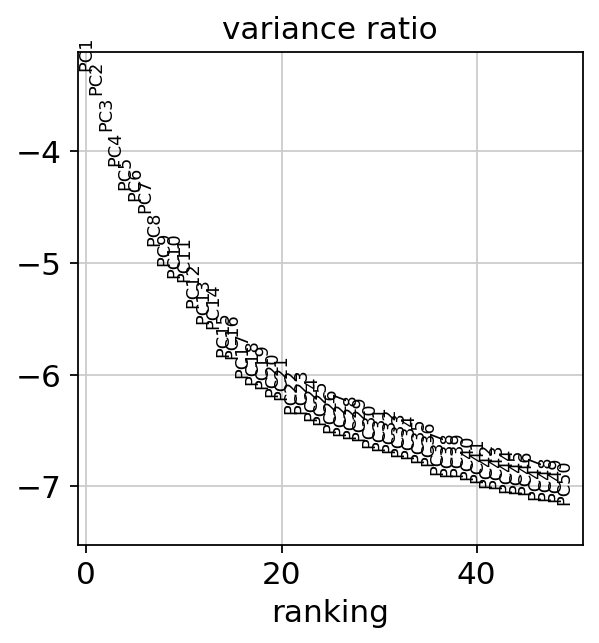

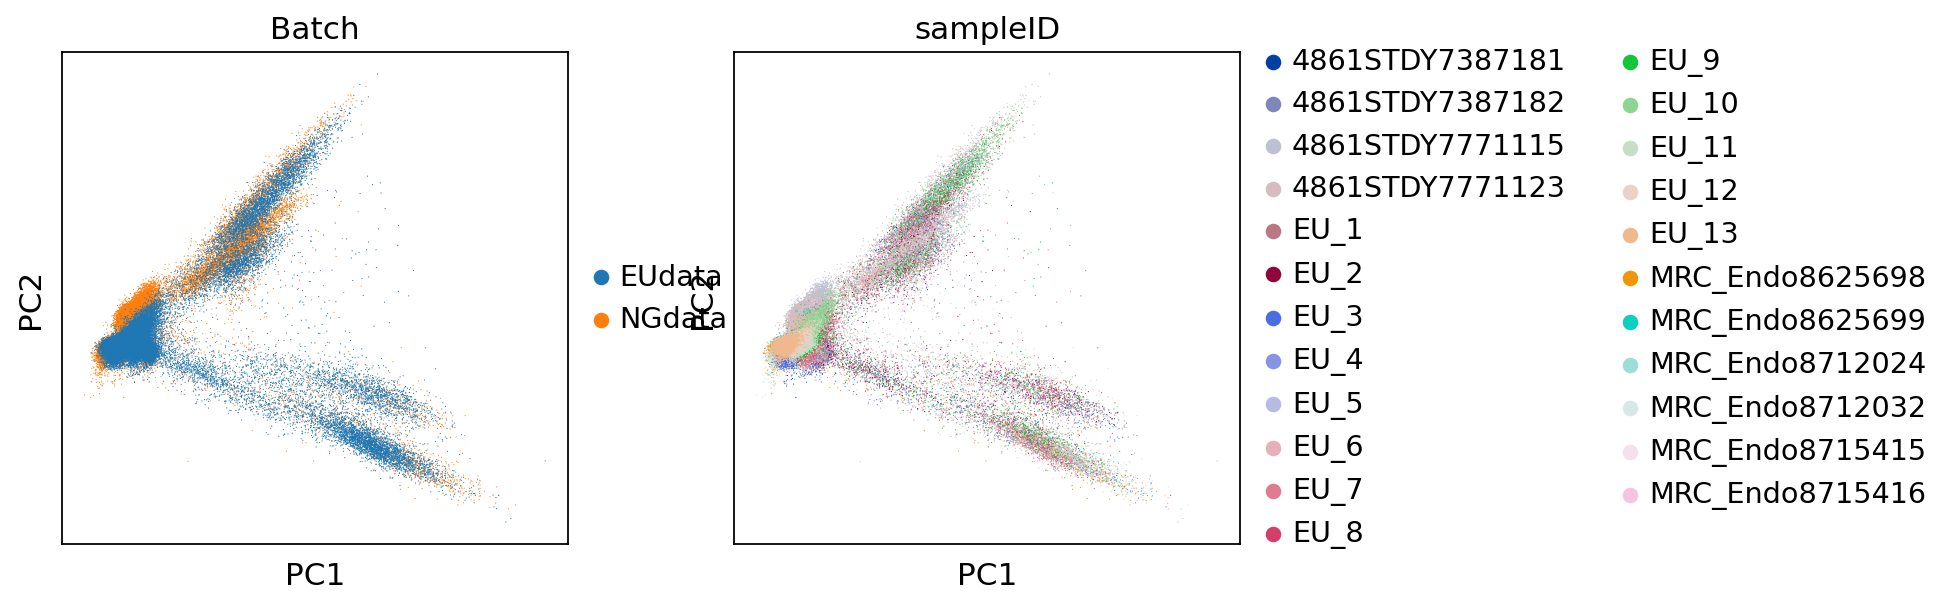

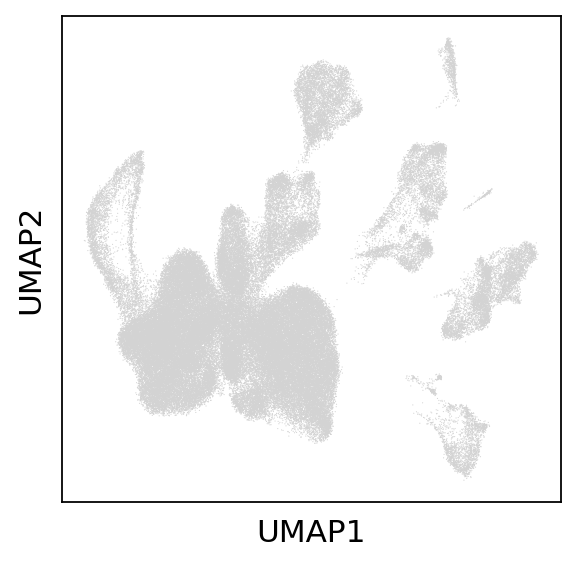

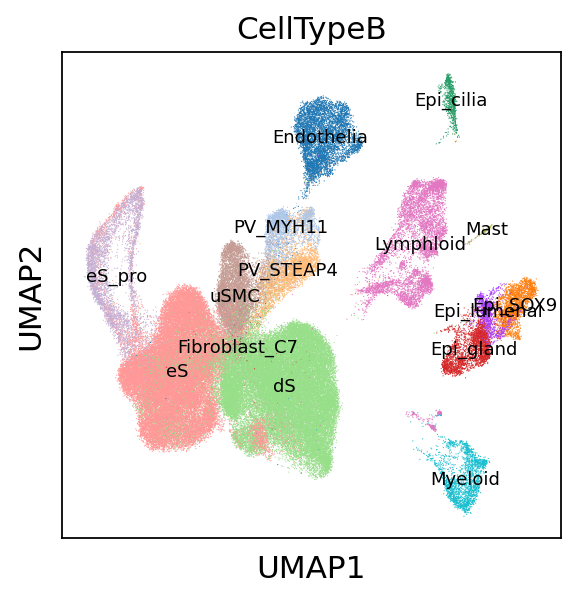

In [9]:
adata=[NGdata,EUdata]
adata=ad.concat(adata,merge="same")

adata.var['mt']=adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.write("adata_normalized.h5ad")

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata,save="adata_High_variable_genes.png")
adata.raw = adata

adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True,n_pcs=50,save="adata_PCA_variance.png")
sc.pl.pca(adata,color=['Batch','sampleID'])
adata.write("adata_pca.h5ad")

bbknn.bbknn(adata,batch_key='sampleID')
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.louvain(adata)
sc.tl.leiden(adata)
adata
adata.write("NG_and_OurEU_integrated_leiden_BBKNN.h5ad")
sc.pl.umap(adata,color=['CellTypeB'],legend_loc="on data",legend_fontsize='xx-small',legend_fontweight='medium')

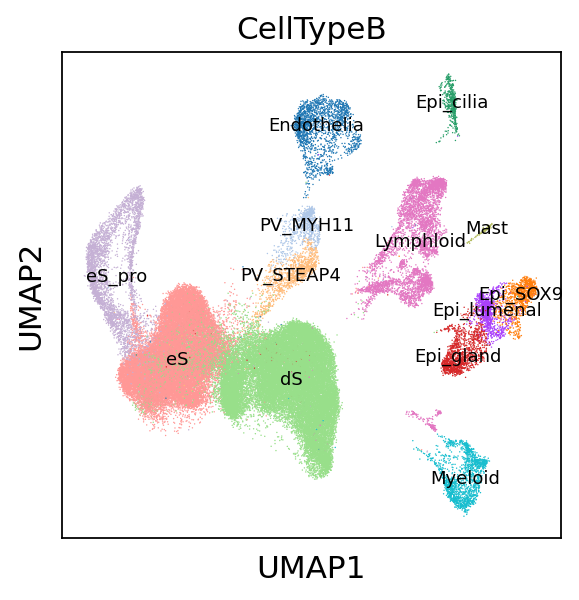

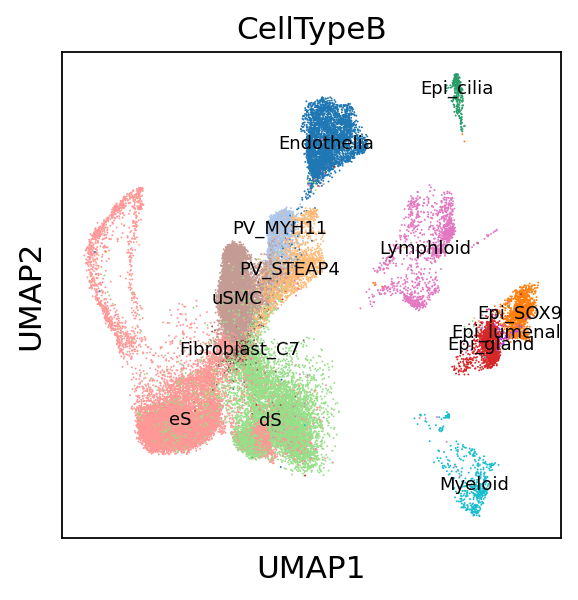

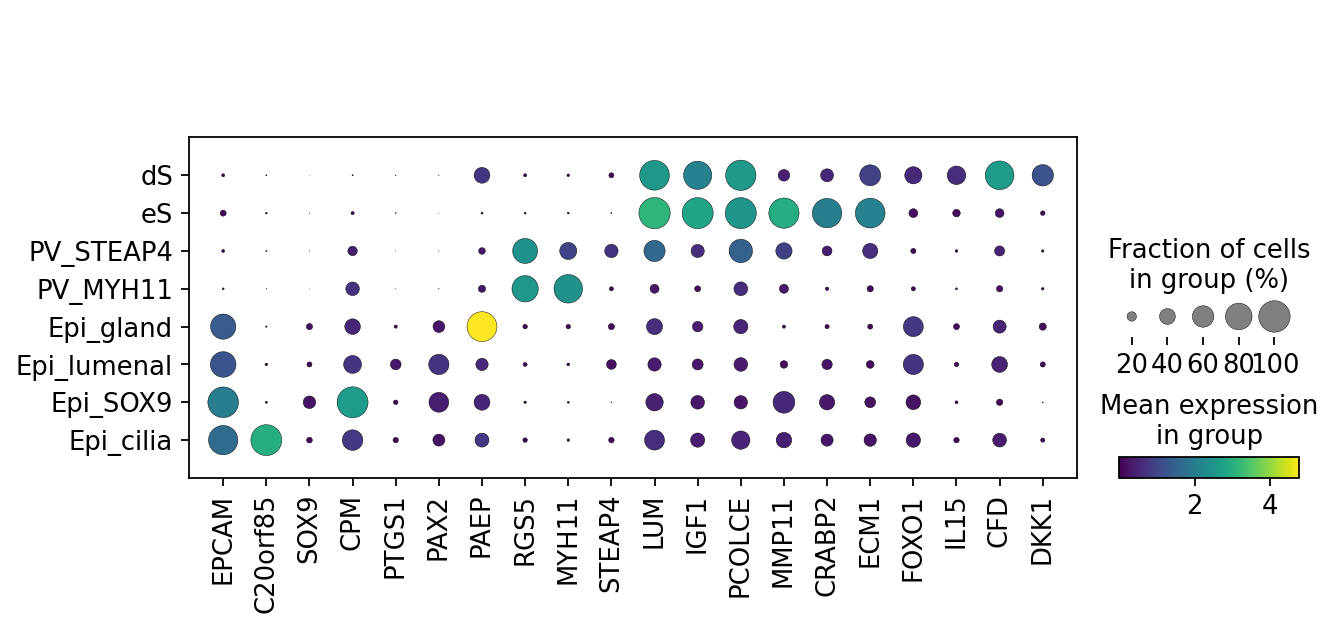

In [10]:
sc.pl.umap(adata[adata.obs['Batch']=="EUdata",],color=['CellTypeB'],legend_loc="on data",legend_fontsize='xx-small',legend_fontweight='medium')
sc.pl.umap(adata[adata.obs['Batch']=="NGdata",],color=['CellTypeB'],legend_loc="on data",legend_fontsize='xx-small',legend_fontweight='medium')
mycells=adata[adata.obs['CellTypeB'].isin(['dS','eS','PV_STEAP4','PV_MYH11','Epi_gland','Epi_lumenal','Epi_SOX9','Epi_cilia']),]
sc.pl.dotplot(mycells,['EPCAM','C20orf85','SOX9','CPM','PTGS1','PAX2','PAEP','RGS5','MYH11','STEAP4','LUM','IGF1','PCOLCE','MMP11','CRABP2','ECM1','FOXO1','IL15','CFD','DKK1'],groupby="CellTypeB",cmap=None,categories_order=['dS','eS','PV_STEAP4','PV_MYH11','Epi_gland','Epi_lumenal','Epi_SOX9','Epi_cilia'])

